In [69]:
#import important liabrary
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.pandas.set_option('display.max_columns', None)

In [70]:
#loading dataset
data_train=pd.read_csv(r"C:\Users\saurabh srivastava\Desktop\Malignant Comments Classifier Project\train.csv")
data_train

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [71]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                159571 non-null  object
 1   comment_text      159571 non-null  object
 2   malignant         159571 non-null  int64 
 3   highly_malignant  159571 non-null  int64 
 4   rude              159571 non-null  int64 
 5   threat            159571 non-null  int64 
 6   abuse             159571 non-null  int64 
 7   loathe            159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [72]:
target_col=['malignant','highly_malignant','rude','threat','abuse','loathe']

In [73]:
for i in target_col:
    print(i)
    print(data_train[i].value_counts())
    print("\n")

malignant
0    144277
1     15294
Name: malignant, dtype: int64


highly_malignant
0    157976
1      1595
Name: highly_malignant, dtype: int64


rude
0    151122
1      8449
Name: rude, dtype: int64


threat
0    159093
1       478
Name: threat, dtype: int64


abuse
0    151694
1      7877
Name: abuse, dtype: int64


loathe
0    158166
1      1405
Name: loathe, dtype: int64




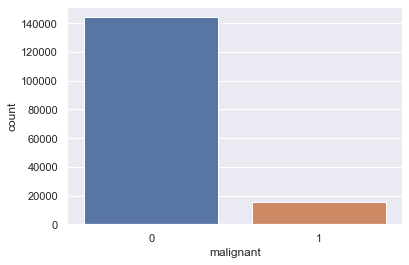

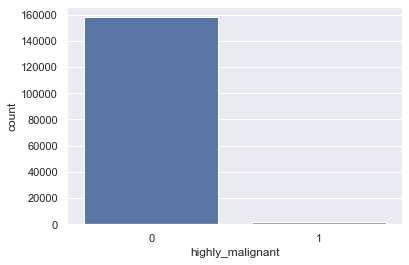

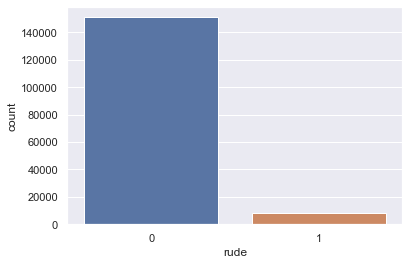

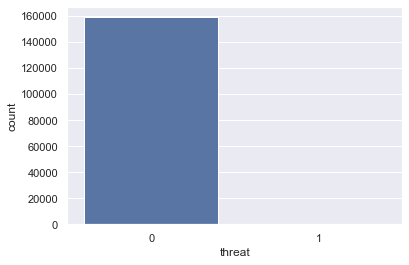

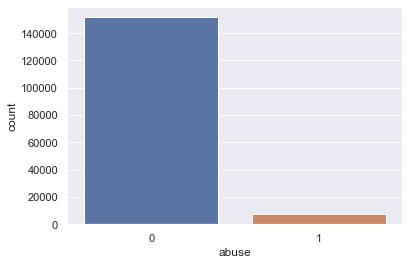

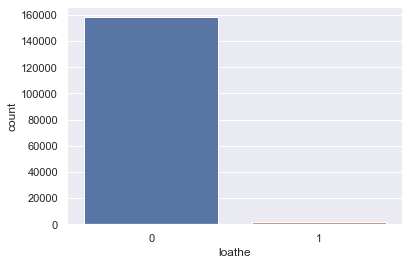

In [74]:
for i in target_col:
    sns.countplot(i,data=data_train)
    plt.show()

In [78]:
import re
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
from nltk.corpus import stopwords
import string

[nltk_data] Downloading package punkt to C:\Users\saurabh
[nltk_data]     srivastava\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [79]:
description_list_train=[]
for description in data_train.comment_text:
    description=re.sub("[^a-zA-Z]"," ",description)
    description=description.lower()
    description=nltk.word_tokenize(description)
    lemma=nltk.WordNetLemmatizer()
    description=[lemma.lemmatize(word) for word in description]
    description = " ".join(description)
    description_list_train.append(description)

In [81]:
data_train['new_comment_text']=description_list_train
data_train['new_comment_text']

0         explanation why the edits made under my userna...
1         d aww he match this background colour i m seem...
2         hey man i m really not trying to edit war it s...
3         more i can t make any real suggestion on impro...
4         you sir are my hero any chance you remember wh...
                                ...                        
159566    and for the second time of asking when your vi...
159567    you should be ashamed of yourself that is a ho...
159568    spitzer umm there no actual article for prosti...
159569    and it look like it wa actually you who put on...
159570    and i really don t think you understand i came...
Name: new_comment_text, Length: 159571, dtype: object

In [82]:
#loading dataset
data_test=pd.read_csv(r"C:\Users\saurabh srivastava\Desktop\Malignant Comments Classifier Project\test.csv")
data_test

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.
...,...,...
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu..."
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ..."
153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the..."


In [83]:
description_list_test = []
for description in data_test.comment_text:
    description = re.sub("[^a-zA-Z]"," ",description)
    description = description.lower()
    description = nltk.word_tokenize(description)
    
    lemma=nltk.WordNetLemmatizer()
    description = [ lemma.lemmatize(word) for word in description]
    description = " ".join(description)
    description_list_test.append(description)
    
data_test['new_comment_text'] = description_list_test
data_test["new_comment_text"]

0         yo bitch ja rule is more succesful then you ll...
1                    from rfc the title is fine a it is imo
2                             source zawe ashton on lapland
3         if you have a look back at the source the info...
4                   i don t anonymously edit article at all
                                ...                        
153159    i totally agree this stuff is nothing but too ...
153160    throw from out field to home plate doe it get ...
153161    okinotorishima category i see your change and ...
153162    one of the founding nation of the eu germany h...
153163    stop already your bullshit is not welcome here...
Name: new_comment_text, Length: 153164, dtype: object

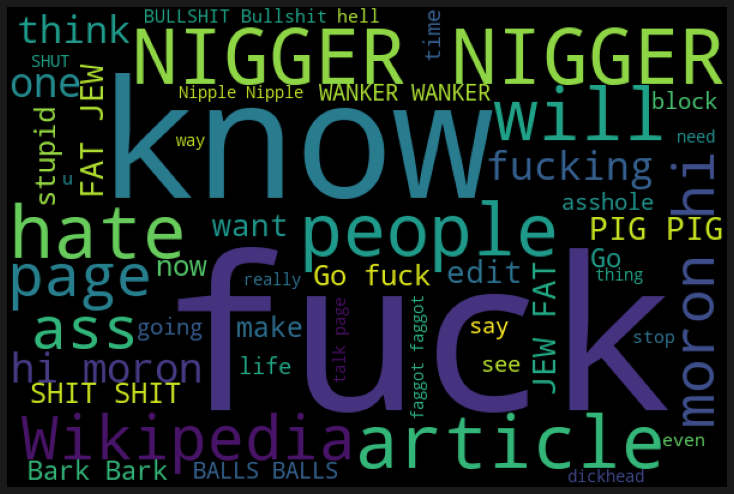

In [84]:
#Getting sense of loud words which are offensive
from wordcloud import WordCloud
offensive= data_train['comment_text'][data_train['malignant']==1]
spam_cloud = WordCloud(width=600,height=400,background_color='black',max_words=50).generate(' '.join(offensive))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [85]:
target_data = data_train[target_col]

data_train['bad'] =data_train[target_col].sum(axis =1)
print(data_train['bad'].value_counts())
data_train['bad'] = data_train['bad'] > 0 
data_train['bad'] = data_train['bad'].astype(int)
print(data_train['bad'].value_counts())

0    143346
1      6360
3      4209
2      3480
4      1760
5       385
6        31
Name: bad, dtype: int64
0    143346
1     16225
Name: bad, dtype: int64


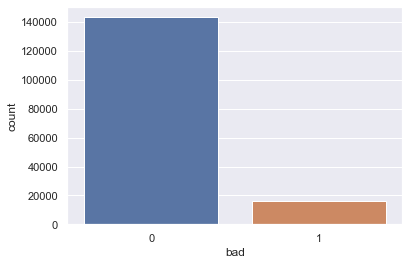

In [86]:
sns.set()
sns.countplot(x="bad" , data = data_train)
plt.show()

In [87]:
#  Convert text into vectors using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tf_vec = TfidfVectorizer(max_features = 10000, stop_words='english')
features = tf_vec.fit_transform(data_train['comment_text'])
x = features

In [88]:
from sklearn.model_selection import train_test_split

In [89]:
y=data_train['bad']
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=56,test_size=.30)

In [90]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,f1_score

In [91]:
from sklearn.linear_model import LogisticRegression

In [92]:
# LogisticRegression
LG = LogisticRegression(C=1, max_iter = 3000)

LG.fit(x_train, y_train)

y_pred_train = LG.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = LG.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9595161997869274
Test accuracy is 0.9552974598930482
[[42733   217]
 [ 1923  2999]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     42950
           1       0.93      0.61      0.74      4922

    accuracy                           0.96     47872
   macro avg       0.94      0.80      0.86     47872
weighted avg       0.95      0.96      0.95     47872



In [93]:
from sklearn.neighbors import KNeighborsClassifier

In [94]:
knn=KNeighborsClassifier(n_neighbors=9)
knn.fit(x_train, y_train)
y_pred_train = knn.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = knn.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9197127995774358
Test accuracy is 0.9152113970588235
[[42816   134]
 [ 3925   997]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.95     42950
           1       0.88      0.20      0.33      4922

    accuracy                           0.92     47872
   macro avg       0.90      0.60      0.64     47872
weighted avg       0.91      0.92      0.89     47872



In [95]:
from sklearn.tree import DecisionTreeClassifier

In [96]:
DT = DecisionTreeClassifier()

DT.fit(x_train, y_train)
y_pred_train = DT.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = DT.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9990420684160108
Test accuracy is 0.9406542446524064
[[41620  1330]
 [ 1511  3411]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.97     42950
           1       0.72      0.69      0.71      4922

    accuracy                           0.94     47872
   macro avg       0.84      0.83      0.84     47872
weighted avg       0.94      0.94      0.94     47872



In [97]:
from sklearn.ensemble import RandomForestClassifier

In [98]:
RF = RandomForestClassifier()

RF.fit(x_train, y_train)
y_pred_train = RF.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = RF.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9990331157843848
Test accuracy is 0.9563628008021391
[[42413   537]
 [ 1552  3370]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     42950
           1       0.86      0.68      0.76      4922

    accuracy                           0.96     47872
   macro avg       0.91      0.84      0.87     47872
weighted avg       0.95      0.96      0.95     47872



In [99]:
from sklearn.metrics import roc_curve,roc_auc_score,auc

In [100]:
from sklearn.metrics import plot_roc_curve

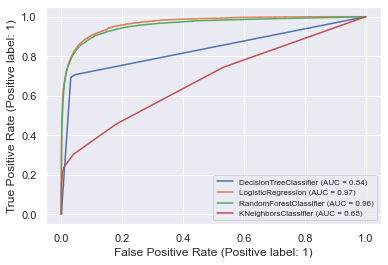

In [101]:
disp=plot_roc_curve(DT,x_test,y_test)
plot_roc_curve(LG,x_test,y_test,ax=disp.ax_)
plot_roc_curve(RF,x_test,y_test,ax=disp.ax_)
plot_roc_curve(knn,x_test,y_test,ax=disp.ax_)
plt.legend(prop={'size':8},loc='lower right')
plt.show()

In [102]:
import eli5
eli5.show_weights(LG,vec = tf_vec, top = 15)  #Lofistic Regression forest
# will give you top 15 features or words  which makes a comment toxic

Weight?,Feature
+16.275,fuck
+13.233,fucking
+11.755,shit
+11.426,idiot
+10.769,stupid
+10.082,ass
+9.509,asshole
+8.741,bullshit
+8.495,bitch
+8.183,suck


In [103]:
data_test=tf_vec.fit_transform(data_test['comment_text'])
data_test

<153164x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 2940344 stored elements in Compressed Sparse Row format>

In [68]:
prediction=LG.predict(data_test)
prediction

array([1, 0, 1, ..., 0, 0, 0])

In [60]:
import joblib
joblib.dump(LG,"malignant.pkl")

['malignant.pkl']